In [4]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
import numpy as np

In [5]:
(trainX, trainy), (testX, testy) = mnist.load_data()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


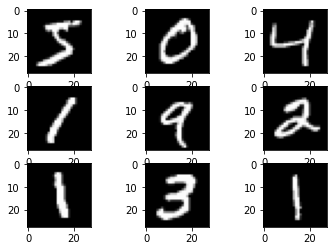

In [7]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
trainX[0].shape

(28, 28)

In [9]:
X = []
for i in range(len(trainX)): #Flattening all the images and storing in X
    X.append(trainX[i].ravel())

In [11]:
X = np.array(X) #Converting list to numpy
X.shape

(60000, 784)

# Displaying Mean Image

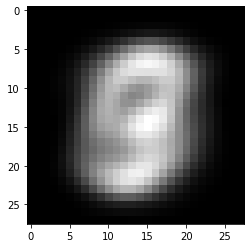

In [14]:
plt.imshow(trainX.mean(axis=0), cmap=plt.get_cmap('gray')) #Mean Image

In [15]:
M = X - X.mean(axis=0) #mean subtracted images

In [16]:
M.shape

(60000, 784)

# Displaying Mean Subtracted Images

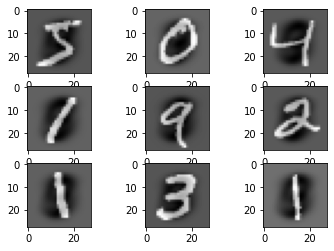

In [18]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(M[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [19]:
def PCA(M):
    C = np.cov(M.T) #shape : (164, 164)
    print("Covariance matrix dimensions = ",C.shape)
    U, V = np.linalg.eigh(C) # U -values, V- vectors
    print(f"U : {U.shape}, V : {V.shape}")
    return [U, V]

In [21]:
U, V = PCA(M)

Covariance matrix dimensions =  (784, 784)
U : (784,), V : (784, 784)


# Printing Eigen values in descending order

In [43]:
for i in range(1,20): #Printing Eigen Values
    print(U[-i])

332724.66744656814
243283.9390705018
211507.36705826788
184776.38586218827
166926.83131065618
147844.96167532488
112178.20271178275
98874.42962708704
94696.24905303968
80809.82453194581
72313.62025956856
69358.30132665254
58826.87114946203
58014.08401671344
54123.75694878495
50843.06852706128
45412.60630628244
43778.459131568656
40705.34045340071


# Displaying Eigen Digits

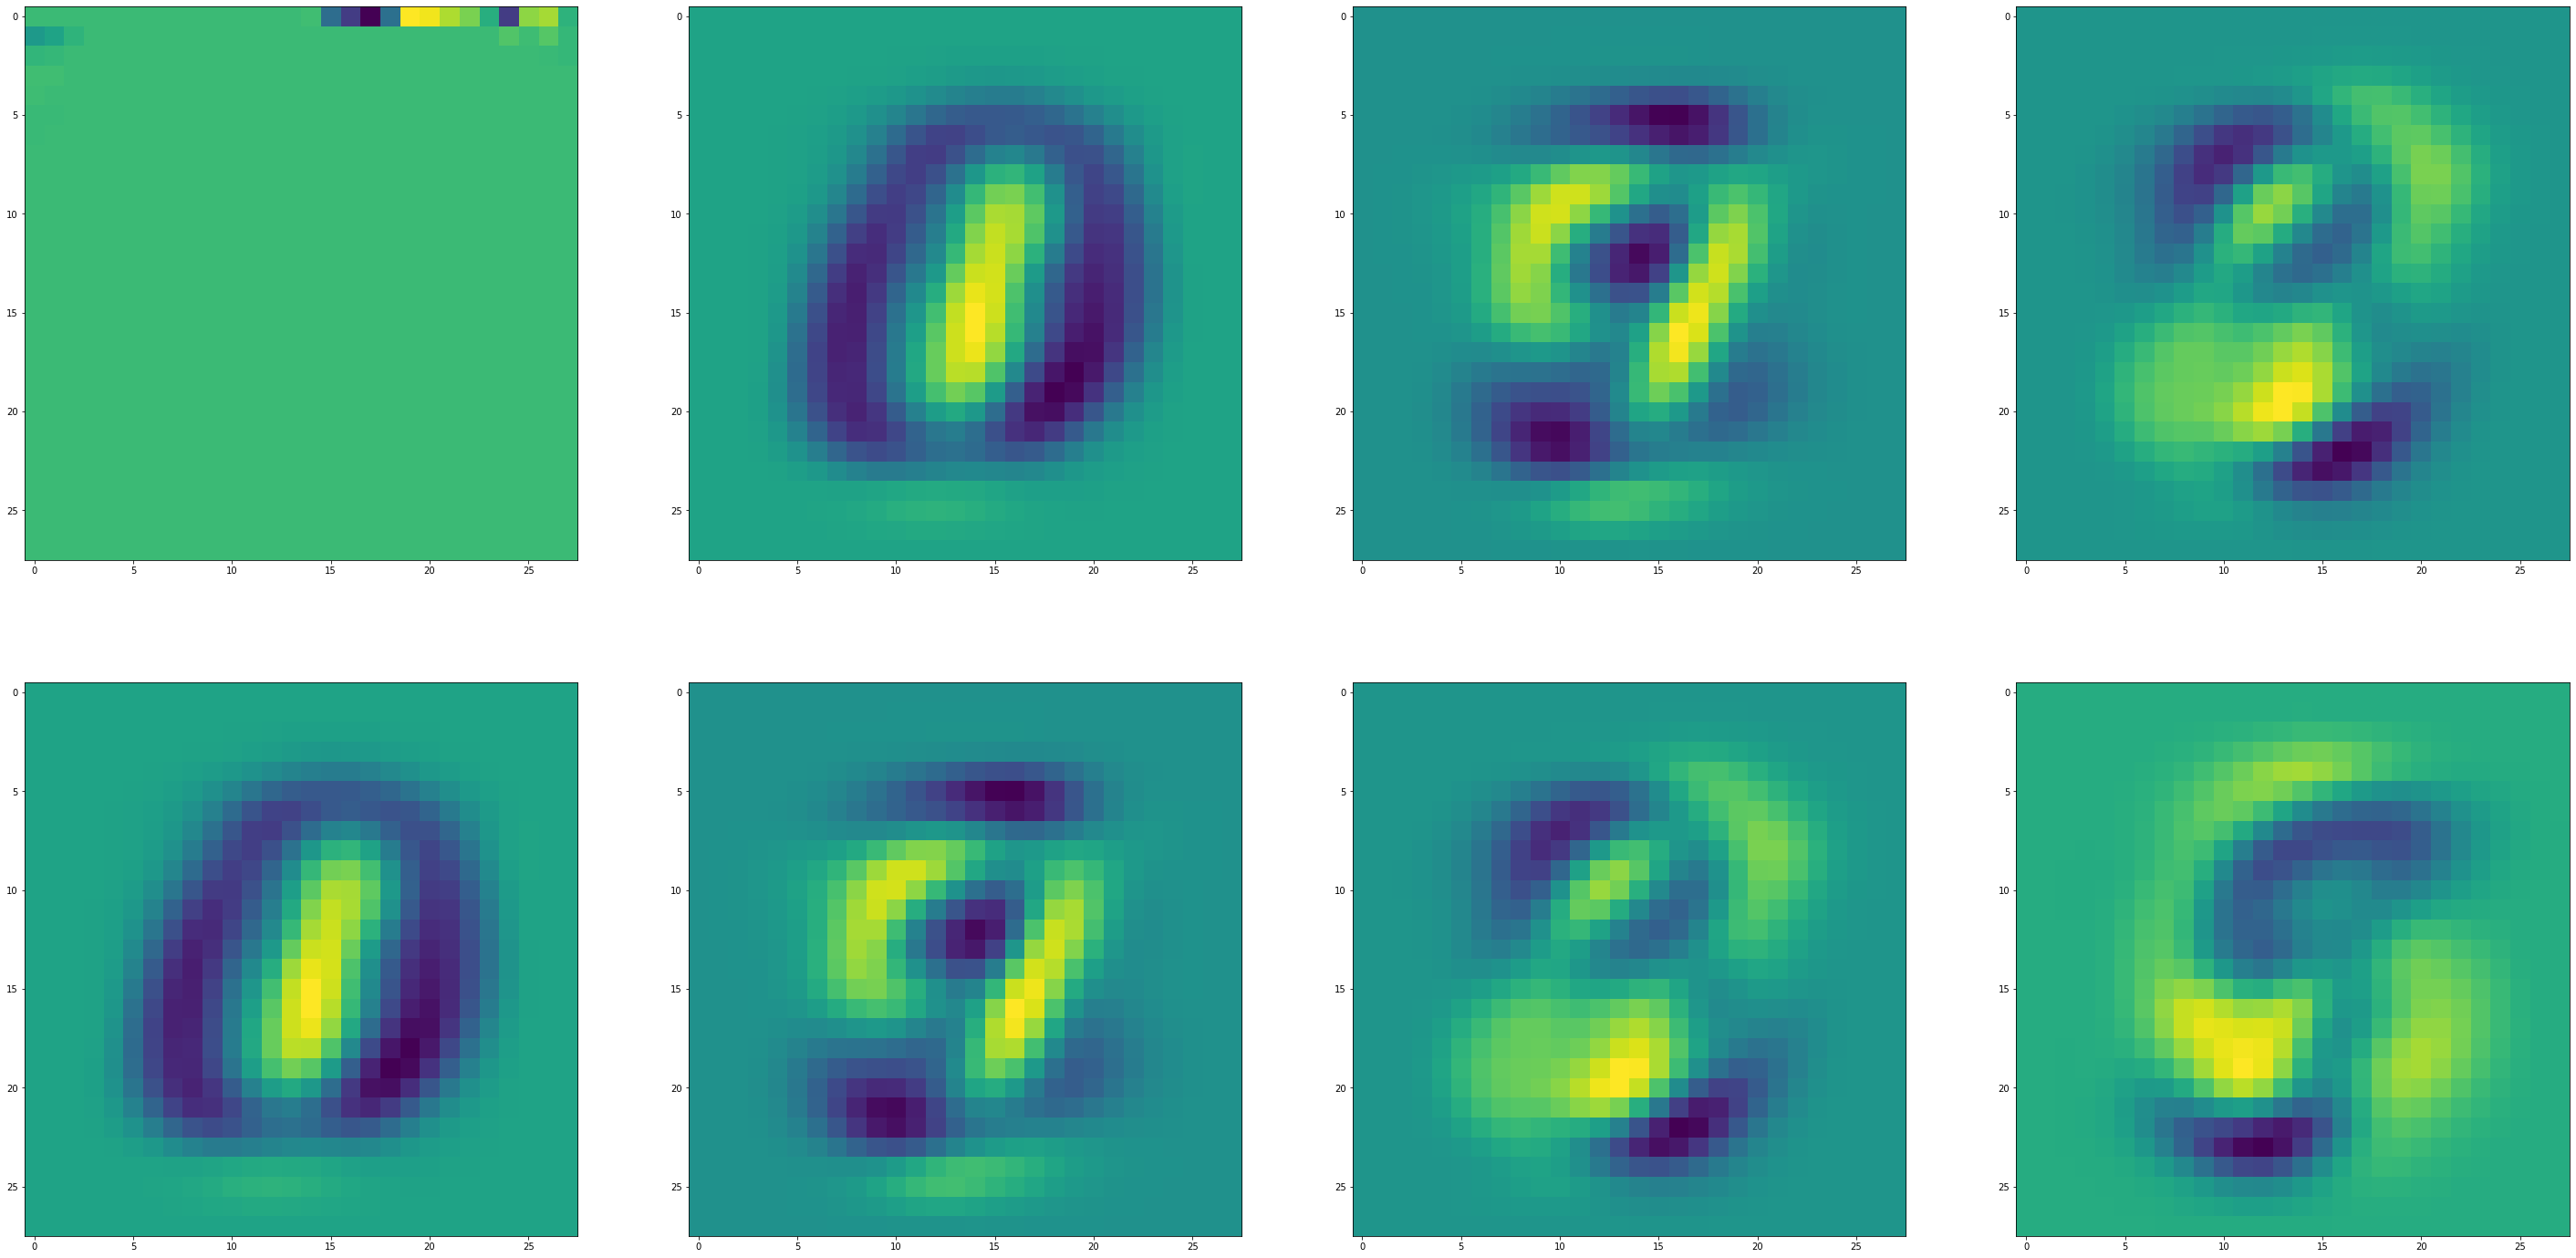

In [29]:
_, ax = plt.subplots(nrows=2, ncols=4, figsize=(50, 25)) 
for i in range(2): #Largest 8 components
    for j in range(4):
        ax[i][j].imshow(V[:, -i-j].reshape((28,28)))
plt.show()

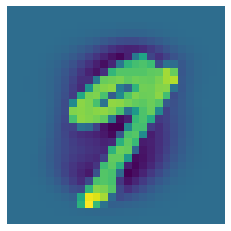

In [32]:
#temp = testX[20].ravel()
testface = testX[20] - X.mean(axis=0).reshape((28,28))
plt.axis("off")
plt.imshow(testface) #Mean subtracted Image Test Image

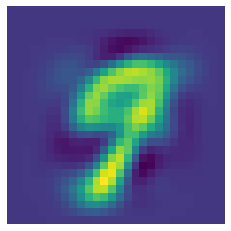

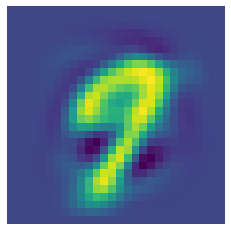

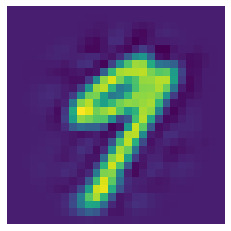

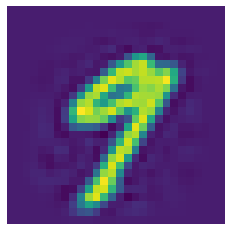

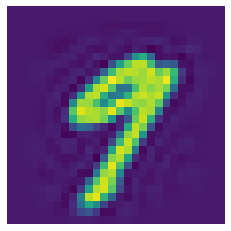

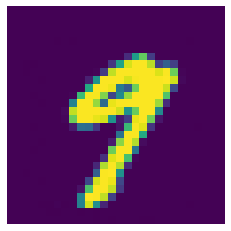

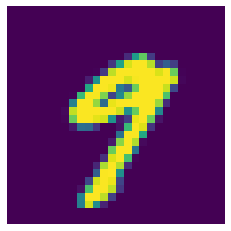

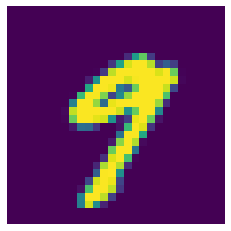

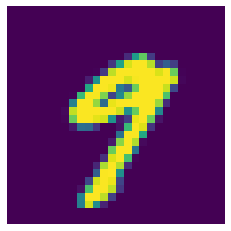

In [36]:
rlist = [10, 20, 100, 150, 200,500,1000,2000,10000 ]# 2600, 4000] #Eigenfaces
for i in rlist:
    recon_face = X.mean(axis=0) + V[:, -i:] @ V[:, -i:].T @ testface.flatten()
    rface = recon_face.reshape((28,28))
    img = plt.imshow(rface)
#     img.set_cmap('gray')
    plt.axis("off")
    plt.show()

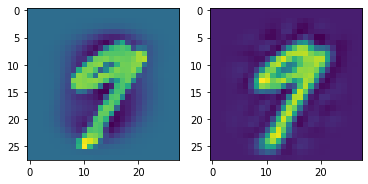

In [41]:
_, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(testface)
rec = recon_face = X.mean(axis=0) + V[:, -100:] @ V[:, -100:].T @ testface.flatten()
rface = rec.reshape((28,28))
ax[1].imshow(rface)
plt.show()